### Download the data
Let's download and uncompress our data and images here:

In [1]:
import platform
display(platform.system())
import os
file_download_link = 'https://www.dropbox.com/scl/fi/x4vhkglosags3qmg4h0p2/hw3data.zip?rlkey=kke6onzuc2rajohgislutjgg7&dl=0'
if os.name == 'nt':
    print('Please download your dataset here:', file_download_link)
else:
    # We need to first download the data here:
    !wget -O data.zip "$file_download_link" -o /dev/null
    !unzip data.zip > /dev/null

'Windows'

Please download your dataset here: https://www.dropbox.com/scl/fi/x4vhkglosags3qmg4h0p2/hw3data.zip?rlkey=kke6onzuc2rajohgislutjgg7&dl=0


In [2]:
# If your data is on google drive then uncomment the code below to access
# your google drive.
#from google.colab import drive
#drive.mount('/content/drive')

## Running Tensorflow Keras on our Titanic dataset (25 points)
[tf.keras.models](https://www.tensorflow.org/api_docs/python/tf/keras/Model), [tf.keras.layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer)
### Q1: We will now implement customization via Keras. Be creative building you NN.
Make sure you set the verbose parameter to 0 when you train your model. Not doing so will result in your TA's being unable to grade your submission.
You can use history to plot your Loss/Metrics.
Make sure you generate a Loss/Metrics plot for each question.

In [137]:
# Prerequisite library imports
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

# Let's reimport our data
df = pd.read_csv('./data/titanic/train_data.csv')
X = df.drop(['Unnamed: 0', 'PassengerId'], axis=1)
y = df['Survived']
X = X.drop(columns = 'Survived')

### 1.1) Based on the imports above we will use those keras libraries to build our models. Here we want to implement a form of scaling to your data either minmax normalization or standardization using the sklearn.preprocessing libraries. Justify why you chose one over the other. Is this classfication or regression? (10 points)

I choose standardization in this scenario, as different features seem to have different underlying distributions. Also, the units of measurement are not comparable from feature to feature (such as family size and fare), so standardizing will help remove some the inherent biases in the quantitative data. As for the the type, we are doing classification - we are trying to predict the outcome of "survived", a binary variable. We are trying to predict each set of independent variables to be either 0 or 1.

In [4]:
# Please use your scalarization of X here: then run the cell below to split your training and test data.
# Scalarization means normalizing or standardizing

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler


stl = StandardScaler()
stl.set_output(transform='pandas')
X = stl.fit_transform(X)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
display(X_train.shape)
display(y_train.shape)

(633, 14)

(633,)

In [6]:
# Write your model, and training here
model = Sequential()

### Now lets compile our model using the function compile
### Here we will use rmsprop as an optimizer and binary crossentropy as our loss function

In [7]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')

### 1.2) Using the example for traindata above create a model using different activation functions by setting MYACTIVATIONFXN: (10 points)

Here is the example code you can use to build your own DNN after you check the shape of your X matrix. Similar to HW2
```python
# Hint! You can start with model.add(Dense(units = 16, activation = 'relu', input_dim = ?))
# Make sure the input_dim parameter is set to the number of features in your X matrix.
MYACTIVATIONFXN = 'SOMEFXN'
model.add(Dense(units = 14, activation = MYACTIVATIONFXN, input_dim = ?))
```


In [8]:
# Let's initialize our model
model = Sequential() # Initialising the ANN/DNN

In [9]:
# Let's Check the shape of our data!
# This should match your input layer
X.shape

(792, 14)

In [10]:
# If you decide to initially use a sigmoid, make sure the number of units matches the number of targets
# in this case we only have 1 target so for sigmoid you need to set units to 1
# Please use the example code above in the hint.
MYACTIVATIONFXN = 'sigmoid'
model.add(Dense(units = 16, activation = MYACTIVATIONFXN, input_dim = 14, name='first'))
model.add(Dense(units = 16, activation = MYACTIVATIONFXN))
model.add(Dense(units = 1, activation = MYACTIVATIONFXN))

### Now lets compile our model using the function compile
### Here we will use rmsprop as an optimizer and binary crossentropy as our loss function

In [11]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics=['acc'])


Implement tensorflows [early stopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) library. Feel free to play with the settings and parameters

In [12]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='acc',
    min_delta=0,
    patience=1,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=1
)

### Here we will run our ANN/DNN using the fit function using a batch size of 1 and 10 epochs
Early stopping has been added to your model.fit call

In [13]:
# I have provided the code for you here:
# Feel free to play around with the code as you please
history = model.fit(X_train.astype('float'), y_train,
                    batch_size = 1, epochs = 10, validation_split = 0.2, 
                    callbacks = [early_stopping], verbose = 0)


### 1.3) How does the error (in terms of accuracy, precission or recall) differ between your models from hw2? Write in one paragraph or less how the error differs and why. (5 points)

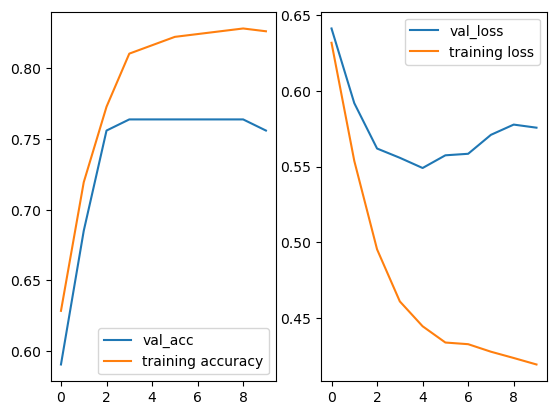

Train accuracy 0.8183254344391785
Train dataset scores 
               precision    recall  f1-score   support

           0       0.82      0.91      0.86       394
           1       0.81      0.67      0.74       239

    accuracy                           0.82       633
   macro avg       0.82      0.79      0.80       633
weighted avg       0.82      0.82      0.81       633

test accuracy 0.7610062893081762
Testing scores 
               precision    recall  f1-score   support

           0       0.75      0.87      0.81        92
           1       0.77      0.61      0.68        67

    accuracy                           0.76       159
   macro avg       0.76      0.74      0.75       159
weighted avg       0.76      0.76      0.76       159



In [14]:
# Hint! Use the predict function if you don't have logits you will need to threshold your results. 0.5 is reasonable.
# Please see the BCC jupyter notebook to see how to do this
# Predict your train, test
# Evaluate your history

#history = model.fit(x=X_train,y=y_train,epochs=100, validation_split=0.2,verbose=0)


loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']
fix, ax = plt.subplots(1,2)
ax[0].plot(val_acc, label='val_acc')
ax[0].plot(acc, label='training accuracy')
ax[0].legend()

ax[1].plot(val_loss, label='val_loss')
ax[1].plot(loss, label='training loss')
ax[1].legend()
plt.show()


train_pred = [1 if x>=0.5 else 0 for x in model.predict(X_train, verbose=0)]
print('Train accuracy',accuracy_score(y_train, train_pred))
print('Train dataset scores \n',classification_report(y_train, train_pred))


test_pred = [1 if x>=0.5 else 0 for x in model.predict(X_test, verbose=0)]
print('test accuracy',accuracy_score(y_test, test_pred))
print('Testing scores \n', classification_report(y_test, test_pred))

Compared to my model in hw2, all of my metrics were worse. The error was worse in every single category. I believe the cause of this is due to the lower number of epochs as in hw2 we used 100 epochs, whereas in this model we did 1 to 10 epochs. We can see that the validation accuracy doesn't keep up with the training accuraccy, which indicates overfitting.

## 2) Complex fit of flowers (30 points)

The cool stuff starts with more complex functions. The [Deep learning course from Andrew Ng](https://www.coursera.org/learn/neural-networks-deep-learning?specialization=deep-learning) show a way to predict [Rose-functions](https://en.wikipedia.org/wiki/Rose_(mathematics)) using a model with multiple nodes. Lets try that as well! This is similar to our example on tf playground.

Let's get started!

First we need to import the data:

In [15]:
import numpy as np
data = np.load('./data/rose/rose.npz')
X, Y = data['X'], data['Y']

To give a feel how it looks, we will first plot the rose, which has 7 petals:

In [16]:
import matplotlib.pyplot as plt
def testModelKeras(X, y, model, h=0.1, f=1.05):
    r = X.max()
    xmesh, ymesh = np.meshgrid(np.arange(-r*f, r*f+h, h), np.arange(-r*f, r*f+h, h))
    Z = model.predict(((np.c_[xmesh.ravel(), ymesh.ravel()])))
    Z = (Z > 0.5) * 1
    Z = Z.T.reshape(xmesh.shape)
    plt.contourf(xmesh, ymesh, Z, cmap=plt.cm.OrRd)
    plt.scatter(X[:,0], X[:,1], c=y.flatten().T, cmap=plt.cm.OrRd)

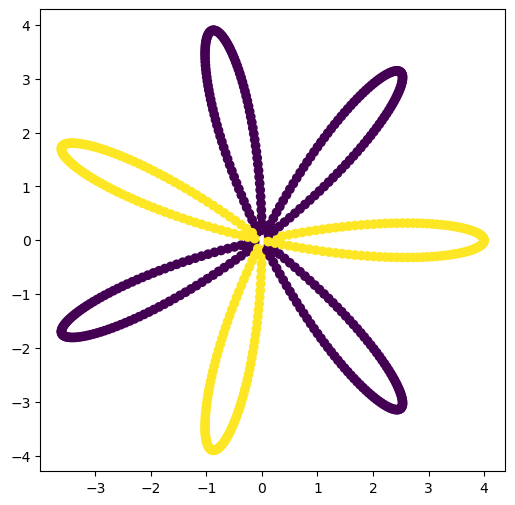

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plt.scatter(X[0,:], X[1,:], c=Y.flatten())

 Is this classfication or regression? Enter your answer below and why.

Classification. We are trying to figure out which node belongs to which petal (color).

#### Q2: We will now implement customization via TensorFlow Keras

In [18]:
import numpy as np
data = np.load('./data/rose/rose.npz')
X, y = data['X'].transpose(), data['Y'].transpose()
display(X.shape)
display(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
display(X_train.shape)
display(y_train.shape)

# Let's initialize our model
model = Sequential() # Initialising the ANN

(688, 2)

(688, 1)

(550, 2)

(550, 1)

### 2.1) Using the example above, try different number of nodes(units) and different activation functions. How does your loss change? (10 points)
Use history to extract the history of your metrics and loss
Enable call backs as you did in Q1

In [19]:
# build your model

#build_model helper, 2 dense layers, 1 output layer
def build_model(model_num, params, output='sigmoid'):
    my_fxn, my_units = params[model_num]
    #print(my_fxn, my_units, output)
    ret_model = Sequential( [
    Dense(units = my_units, activation = my_fxn, input_dim = 2),
    Dense(units = my_units, activation = my_fxn),
    Dense(units = 1, activation = output)])
    return ret_model, params[model_num] #returns the model itself, and the parameters used to build it
    
#params to use
model_params = {'model1':('tanh',10), 
                'model2':('linear',10), 
                'model3':('relu',10), 
                'model4':('relu',4)}
# first model
model1, p1 = build_model('model1', model_params)
model2, p2 = build_model('model2', model_params)
model3, p3 = build_model('model3', model_params)
model4, p4 = build_model('model4', model_params)


In [20]:
# compile your model
model1.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics=['acc'])
model2.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics=['acc'])
model3.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics=['acc'])
model4.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics=['acc'])

In [21]:
# set up your early stopping call backs
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='loss',
    min_delta=0,
    patience=3,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=4
)

In [22]:
h1 = model1.fit(X_train.astype('float'), y_train, batch_size = 10, epochs = 10,
                            callbacks=[early_stopping], verbose = 0, validation_split=0.2)
h2 = model2.fit(X_train.astype('float'), y_train, batch_size = 10, epochs = 10,
                            callbacks=[early_stopping], verbose = 0, validation_split=0.2)
h3 = model3.fit(X_train.astype('float'), y_train, batch_size = 10, epochs = 10,
                            callbacks=[early_stopping], verbose = 0, validation_split=0.2)
h4 = model4.fit(X_train.astype('float'), y_train, batch_size = 10, epochs = 10,
                            callbacks=[early_stopping], verbose = 0, validation_split=0.2)
hist_list = [h1,h2,h3,h4]
param_list = [p1,p2,p3,p4]

model 1 acc: 0.8840909004211426 loss: 0.43706339597702026
model 2 acc: 0.48181816935539246 loss: 0.6695218682289124
model 3 acc: 0.9727272987365723 loss: 0.29463082551956177
model 4 acc: 0.6613636612892151 loss: 0.6697821617126465


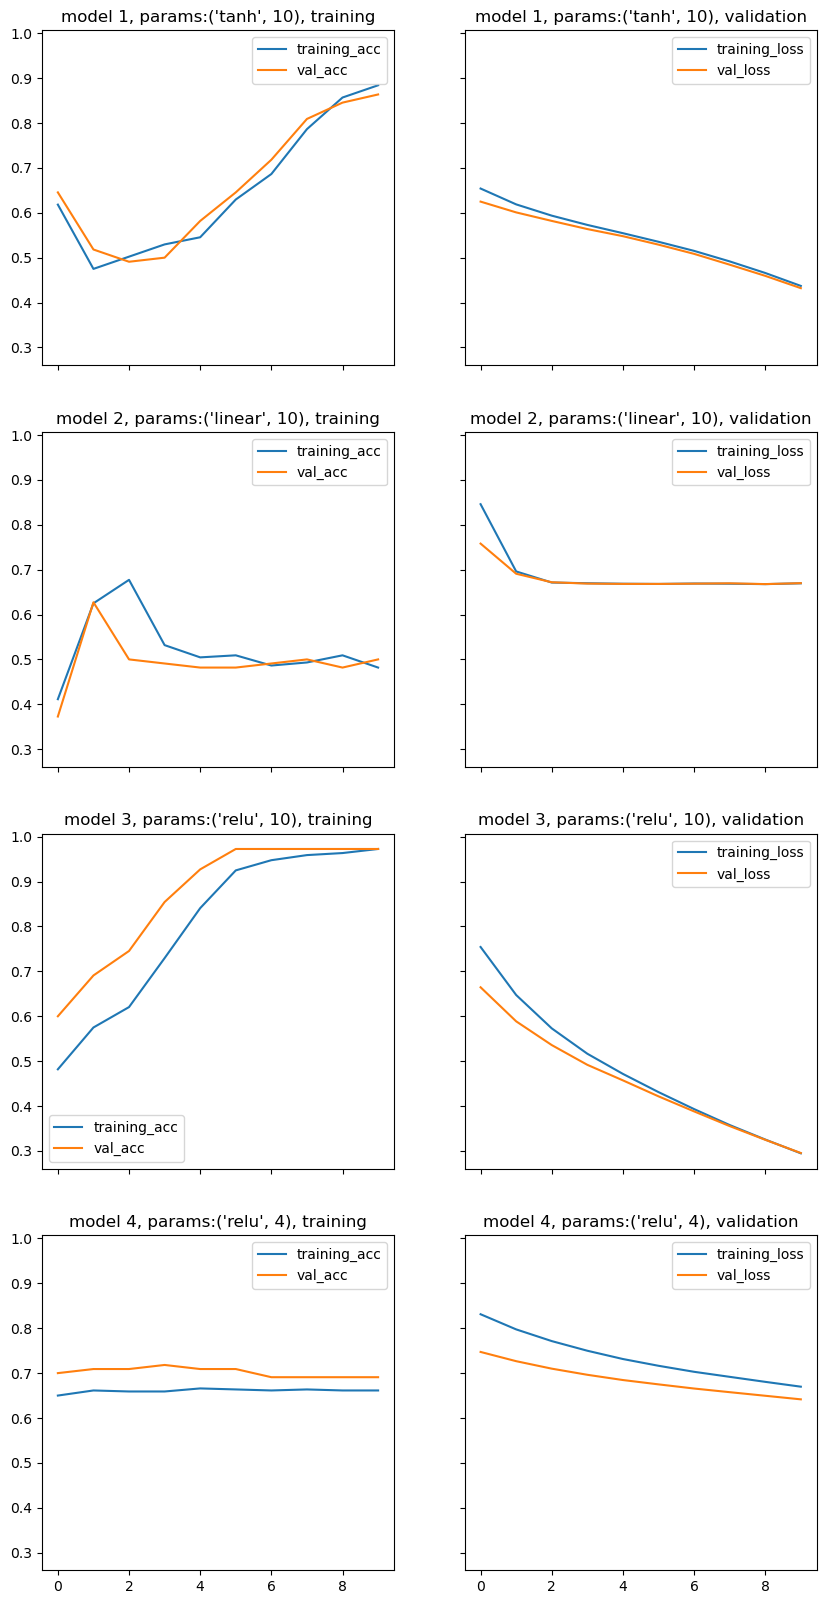

In [23]:
acc1, loss1 = h1.history['acc'], h1.history['loss']
acc2, loss2 = h2.history['acc'], h2.history['loss']
acc3, loss3 = h3.history['acc'], h3.history['loss']
acc4, loss4 = h4.history['acc'], h4.history['loss']

fig, ax = plt.subplots(4,2, figsize=(10,20), sharex=True,sharey=True)
i = 0
for history in hist_list:
    acc, loss = history.history['acc'], history.history['loss']
    valacc, valloss = history.history['val_acc'], history.history['val_loss']
    print('model ' + str(i+1), 'acc:', acc[-1], 'loss:', loss[-1])
    ax[i][0].plot(acc, label='training_acc')
    ax[i][0].plot(valacc, label='val_acc')
    ax[i][0].legend()
    ax[i][0].set_title('model ' + str(i+1) + ', params:' + str(param_list[i]) + ', training')
    ax[i][1].plot(loss, label='training_loss')
    ax[i][1].plot(valloss, label='val_loss')
    ax[i][1].legend()
    ax[i][1].set_title('model ' + str(i+1) + ', params:' + str(param_list[i]) + ', validation')
    #ax[i].set_title('model ' + str(i+1) + ', params:' + str(param_list[i]))
    i+=1
plt.show()

We can see that for the models using tanh as their activation function, the model with 10 nodes starts off with a higher loss, and lower accuracy compared to the version with 4 nodes, but the accuracy and error improve much more quickly than the 4 unit version.
<br>
For the relu model, we see a similar trend, except that the model with more nodes per layer actually has a higher starting accuracy. 

### 2.2) Calculate your new error for 2 different models using classification report. Also, using the metrics, explain why you see the same or why you see a different error. (10 points)

In [24]:
yhat_model1 = [1 if x>=0.5 else 0 for x in model1.predict(X_test, verbose=0)]
yhat_model3 = [1 if x>=0.5 else 0 for x in model3.predict(X_test, verbose=0)]
print('model 1 \n', classification_report(y_test, yhat_model1))
print('model 3 \n', classification_report(y_test, yhat_model3))

model 1 
               precision    recall  f1-score   support

           0       0.86      0.97      0.91        86
           1       0.93      0.75      0.83        52

    accuracy                           0.88       138
   macro avg       0.90      0.86      0.87       138
weighted avg       0.89      0.88      0.88       138

model 3 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        86
           1       0.91      1.00      0.95        52

    accuracy                           0.96       138
   macro avg       0.96      0.97      0.96       138
weighted avg       0.97      0.96      0.96       138



Here, we can see that the error for the second model, (model 3) is much lower than in the first model (model 1). This is due to the fact that for the second model, the training loss grew much closer to the validation loss, which indicates that the model is less overfit and is more generalized towards learning the data classifications. 

### 2.3) Choose your best model! Now plot the new results using the plotting example shown above but using our newly trained best/coolest model. (10 points)

226/226 [==============================] - 0s 641us/step


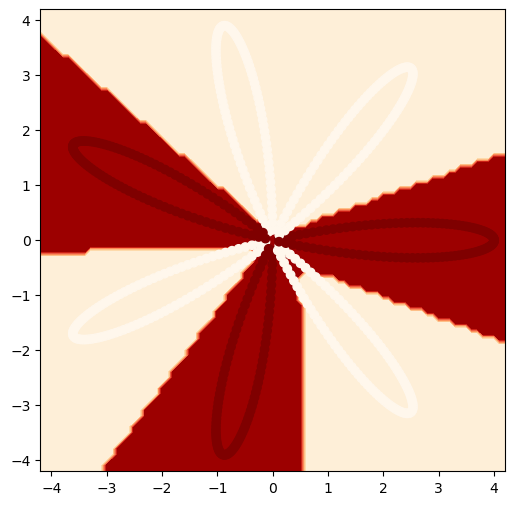

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
testModelKeras(X, Y, model3)

## 3) Cats vs not cats (40 points)

#### Q3: Let's find some cute kittens!

In [26]:
import numpy as np
data = np.load('./data/cats/cats.npz')
X_train, y_train = data['Xtrain'].transpose(), data['Ytrain'].transpose()
X_test, y_test = data['Xtest'].transpose(), data['Ytest'].transpose()
display(X_train.shape)
display(y_train.shape)

# Let's initialize our model
model = Sequential() # Initialising the ANN

(209, 12288)

(209, 1)

### 3.1) Same as before, build a new model with different number of hidden layers, nodes and activation functions. Describe reason for any similarity or difference (20 points)

In [27]:
from keras.models import Sequential
from keras.layers import Dense# Try using different iterations using a simple layout like above. 10, 100, 1000 epochs.
# What happens with your loss?
# I have written the basics of the code for you
MYACTIVATIONFXN = 'relu'
model.add(Dense(units = 128, activation = MYACTIVATIONFXN, input_dim = X_train.shape[1]))
model.add(Dense(units = 64, activation = MYACTIVATIONFXN))
model.add(Dense(units = 32, activation = MYACTIVATIONFXN))
model.add(Dense(units = 16, activation = MYACTIVATIONFXN))
model.add(Dense(units = 1, activation = 'sigmoid'))
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')


Implement early stopping and [model checkpointing](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint) to save your model weights. experiment with other call backs to get your best validation metric. For callbacks, you can save your weights and set up a monitor

In [28]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    #Enter your parameters
    monitor='acc',
    min_delta=0,
    patience=10,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=4
)

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    #Enter your paramaters
    'model_file',
    monitor="loss", mode="auto", 
    save_best_only=True, verbose=0
)

Let's fit our data!

In [29]:
history = model.fit(X_train.astype('float'), y_train, batch_size = 10, epochs = 100, callbacks = [early_stopping, model_checkpoint], verbose = 0)

INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


KeyboardInterrupt: 

#### Try using different layers and activation function with different number of nodes
What happens when you add convolutional layers? What happens to our training loss? </br>
After intitializing your mode make sure you [rescale](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Rescaling) using: ``` keras.layers.Rescaling(1./255) ``` </br>
I will leave it up to you if you want to rescale prior to learning or in the model itself </br>
Here you will begin to add convolutional layers [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) as well as [max pooling 2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPooling2D). You typically want to do max pooling when you change the shape of your conv2d. Max pooling will focus on the most informative features and reduce the memory footprint </br>
This also requires reshaping form 1D to 2D. Hint: Look at the plotting fxn
```
model.add(Conv2D(32, kernel_size=3, activation='leakyrelu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D())
```
Make sure you [flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) before going back into 1D
Make sure your ouput layer performs a binary output for a class kitten and class not kitten
```
model.add(Flatten())
```
After you flatten, you can add your dense layers once again. </br></br>
<em> Note: As noted above, you will have to convert your 1D array back into a 2D array prior to running your convolutional NN. Hint: Look at your plotting function down below!!! </em>

In [44]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    #Enter your parameters
    monitor='loss',
    min_delta=0,
    patience=10,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=4
)

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    #Enter your paramaters
    'model_file',
    monitor="loss", mode="auto", 
    save_best_only=False, verbose=0
)

In [120]:

from tensorflow.keras.layers import Conv2D, Flatten, Rescaling
from tensorflow.keras.layers import MaxPooling2D

MYACTIVATIONFXN = 'relu'
my_model = Sequential()

#my_model.add(Rescaling(1./255)) #data was rescaled..... LOL
my_model.add(Conv2D(16, kernel_size=3, activation=MYACTIVATIONFXN, input_shape=(64, 64, 3)))
my_model.add(MaxPooling2D())
my_model.add(Conv2D(32, kernel_size=3, activation=MYACTIVATIONFXN))
my_model.add(MaxPooling2D())
my_model.add(Conv2D(64, kernel_size=3, activation=MYACTIVATIONFXN))
my_model.add(MaxPooling2D())
my_model.add(Flatten())
my_model.add(Dense(units = 128, activation = MYACTIVATIONFXN))
my_model.add(Dense(units = 64, activation = MYACTIVATIONFXN))
my_model.add(Dense(units = 32, activation = MYACTIVATIONFXN))
my_model.add(Dense(units = 16, activation = MYACTIVATIONFXN))
my_model.add(Dense(units = 1, activation = 'sigmoid'))

my_model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics=['acc'])


In [121]:
xt = X_train.astype('float').reshape([-1,64, 64, 3])
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
tf.keras.utils.disable_interactive_logging()
history = my_model.fit(xt, y_train, batch_size = 1, epochs = 100, 
                    callbacks = [early_stopping, model_checkpoint], verbose = 0,validation_split=0.3)

INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


Prediction step. Make sure you use ```yhat_train``` and ```yhat_test``` variable names for your predictions!

In [122]:
yhat_train = my_model.predict(X_train.astype('float').reshape([-1,64, 64, 3]))
yhat_train = [1 if x>0.5 else 0 for x in yhat_train]
yhat_test = my_model.predict(X_test.astype('float').reshape([-1,64, 64, 3]))
yhat_test = [1 if x>0.5 else 0 for x in yhat_test]

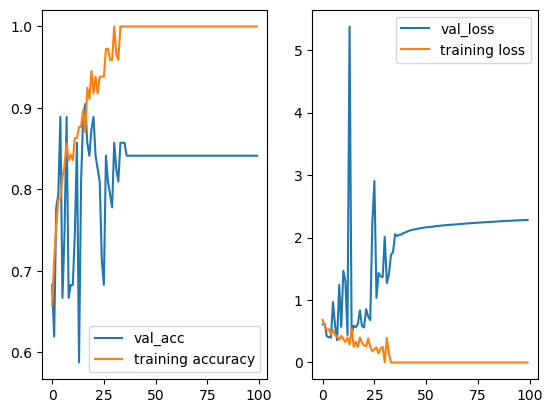

In [123]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']
fix, ax = plt.subplots(1,2)
ax[0].plot(val_acc, label='val_acc')
ax[0].plot(acc, label='training accuracy')
ax[0].legend()

ax[1].plot(val_loss, label='val_loss')
ax[1].plot(loss, label='training loss')
ax[1].legend()
plt.show()

### 3.2) Calculate your accuracy (10 points)
Here you will use both your classification report and your confusion matrix. </br>
Later you will be asked to calculate values manually. You are welcome to pull values from your reports.

In [124]:
# Hint! Use the predict function and threshold your results. 0.5 is reasonable.
# In your classification report since we are only predicting cats you will need to set the parameter labels
# labels=np.unique(yhat_test)
yhat_test=[1 if x>0.5 else 0 for x in yhat_test]
yhat_train=[1 if x>0.5 else 0 for x in yhat_train]
test_matrix = confusion_matrix(y_test, yhat_test)
train_matrix = confusion_matrix(y_train, yhat_train)
print('test dataset \n',classification_report(y_test, yhat_test))
print(test_matrix)
print('\n the accuracy for the test dataset is:', (test_matrix[0,0] + test_matrix[1,1])/len(yhat_test),'!!!')

print('\n train dataset \n',classification_report(y_train, yhat_train))
print(test_matrix)
print('\n the accuracy for the train dataset is:', (train_matrix[0,0] + train_matrix[1,1])/len(yhat_train),'!!!')
print('\n the overall accuracy for the dataset is: ',
      ((test_matrix[0,0] + test_matrix[1,1])+(train_matrix[0,0] + train_matrix[1,1]))/(len(yhat_test)+len(yhat_train)), '!!!')

test dataset 
               precision    recall  f1-score   support

           0       0.78      0.82      0.80        17
           1       0.91      0.88      0.89        33

    accuracy                           0.86        50
   macro avg       0.84      0.85      0.85        50
weighted avg       0.86      0.86      0.86        50

[[14  3]
 [ 4 29]]

 the accuracy for the test dataset is: 0.86 !!!

 train dataset 
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       137
           1       0.92      0.94      0.93        72

    accuracy                           0.95       209
   macro avg       0.94      0.95      0.95       209
weighted avg       0.95      0.95      0.95       209

[[14  3]
 [ 4 29]]

 the accuracy for the train dataset is: 0.9521531100478469 !!!

 the overall accuracy for the dataset is:  0.9343629343629344 !!!


### 3.3) Calculate your precision and recall manually as done in SA1. You cannot use values from your classification report or confusion matrix (10 points)

In [144]:
y_all = np.append(y_test,y_train)
def rec(y,yhat):
    df = pd.DataFrame({'g_truth': y.reshape(-1,), 'pred':yhat})
    tp=len(df[(df['g_truth']==1) & (df['pred']==1)])
    fn=len(df[(df['g_truth']==1) & (df['pred']==0)])
    class1prec = tp/(tp+fn)

    tp=len(df[(df['g_truth']==0) & (df['pred']==0)])
    fn=len(df[(df['g_truth']==0) & (df['pred']==1)])
    class0prec = tp/(tp+fn)
    print('class: 1, recall =', round(class1prec,3))
    print('class: 0, recall =', round(class0prec,3))
    return

yhat_all = np.append(yhat_test, yhat_train)
print('for the test dataset:')
rec(y_test,yhat_test)
print('\n for the test dataset:')
rec(y_train,yhat_train)
print('\n overall:')
rec(y_all,yhat_all)

for the test dataset:
class: 1, recall = 0.879
class: 0, recall = 0.824

 for the test dataset:
class: 1, recall = 0.944
class: 0, recall = 0.956

 overall:
class: 1, recall = 0.924
class: 0, recall = 0.942


In [145]:
def prec(y,yhat):
    df = pd.DataFrame({'g_truth': y.reshape(-1,), 'pred':yhat})
    tp=len(df[(df['g_truth']==1) & (df['pred']==1)])
    fp=len(df[(df['g_truth']==0) & (df['pred']==1)])
    class1prec = tp/(tp+fp)

    tp=len(df[(df['g_truth']==0) & (df['pred']==0)])
    fp=len(df[(df['g_truth']==1) & (df['pred']==0)])
    class0prec = tp/(tp+fp)
    print('class: 1, precision =', round(class1prec,3))
    print('class: 0, precision =', round(class0prec,3))
    return

yhat_all = np.append(yhat_test, yhat_train)
print('for the test dataset:')
prec(y_test,yhat_test)
print('\n for the test dataset:')
prec(y_train,yhat_train)
print('\n overall:')
prec(y_all,yhat_all)

for the test dataset:
class: 1, precision = 0.906
class: 0, precision = 0.778

 for the test dataset:
class: 1, precision = 0.919
class: 0, precision = 0.97

 overall:
class: 1, precision = 0.915
class: 0, precision = 0.948


### Let's plot!!!

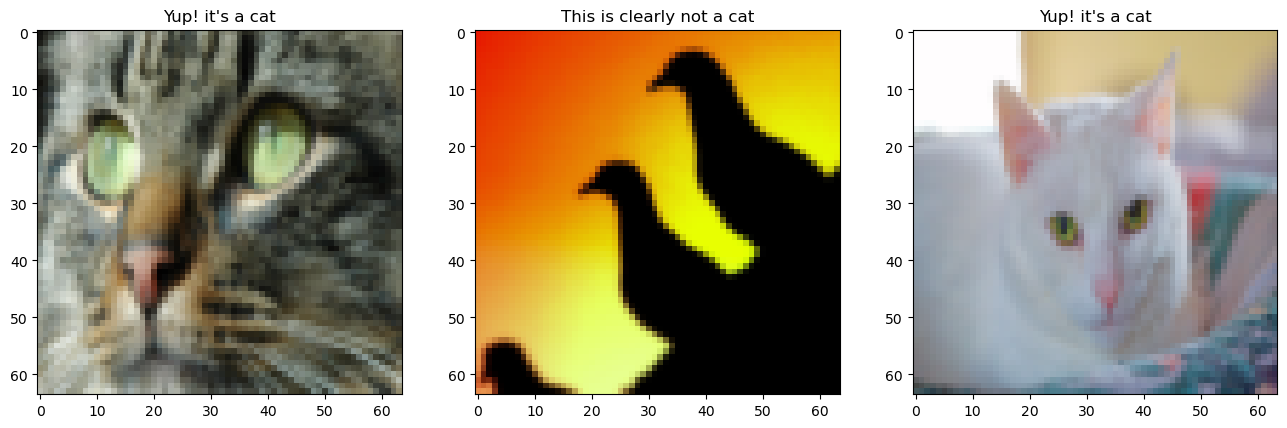

In [148]:
n = 3 # number of images to print
imgs = X_test.reshape([50, 64, 64, 3]) # here we reshape our images so that they are 2D again
fig, ax = plt.subplots(1, n, figsize=(16,8))
for ix in range(n):
    num = np.random.randint(imgs.shape[0]) # randomly selects from 51 images
    ax[ix].imshow(imgs[num])
    if yhat_test[num] == 0:
        ax[ix].set_title('This is clearly not a cat')
    else:
        ax[ix].set_title('Yup! it\'s a cat')

## 4) Collaborative Statement (5 points)
#### You must fill this out even if you worked alone to get credit.

It is mandatory to include a Statement of Collaboration in each submission, that follows the guidelines below.
Include the names of everyone involved in the discussions (especially in-person ones), and what was discussed.
All students are required to follow the academic honesty guidelines posted on the course website. For
programming assignments in particular, I encourage students to organize (perhaps using Piazza) to discuss the
task descriptions, requirements, possible bugs in the support code, and the relevant technical content before they
start working on it. However, you should not discuss the specific solutions, and as a guiding principle, you are
not allowed to take anything written or drawn away from these discussions (no photographs of the blackboard,
written notes, referring to Piazza, etc.). Especially after you have started working on the assignment, try to restrict
the discussion to Piazza as much as possible, so that there is no doubt as to the extent of your collaboration.

Ammie Xie notified me that the data was already scaled (no need to rescale 1.,255) , but otherwise I worked alone.

## Round up!

I hope you all had fun, writing your own ANN. In my opinon, writing these things from the ground up is the best way to learn how it actually works. I hope that you see that these systems are not magical, but simple matrix multiplications, unfortunately just a very lot of them. The most difficult part is of course the back propagation, where we need to calculate the gradients. Our simple ANNs are quite doable, but adding more different layers to them, can make it a bit more cumbersome. Still the essence is very similar to what we have done today.

My suggestion is to play around with these structures, rewrite parts of them, or even better, write your own from scratch!


Please let me know if you have any comments!

the instructions were a bit confusing. I'd like if we could know what metrics we're supposed to compare specifically, or what functions we're allowed to use or not use

## Apendix

### Generating Rose Data

In [ ]:
def generateRoseData():
    k=7
    pointPerPetal = 100
    cutOff = 0.1
    r = 4

    theta = np.linspace(0,np.pi, pointPerPetal * k)
    xx = r * np.cos(k * theta) * np.cos(theta)
    yy = r * np.cos(k * theta) * np.sin(theta)
    cc = [np.ones(pointPerPetal) if ix % 3 == 0 else np.zeros(pointPerPetal) for ix in np.arange(k)]
    cc = np.roll(np.hstack(cc).astype(np.uint8), -pointPerPetal//2)
    x = xx[(xx**2 + yy**2)**0.5 > cutOff]
    y = yy[(xx**2 + yy**2)**0.5 > cutOff]
    col = cc[(xx**2 + yy**2)**0.5 > cutOff]
    X = np.vstack([x,y])
    Y = np.copy(col).reshape([1, -1])
    return X, Y
X, Y = generateRoseData()
np.savez_compressed('./data/rose/rose.npz', X=X, Y=Y)

### Processing Andrews CatvNotCat data

In [ ]:
# If you get an error here, install h5py via pip3 install h5py
import h5py

In [ ]:
# Data downloaded from:
# https://github.com/ridhimagarg/Cat-vs-Non-cat-Deep-learning-implementation
def processCatData():
    train_dataset = h5py.File("./data/cats/train_catvnoncat.h5", mode='r')
    Xtrain = np.array(train_dataset["train_set_x"])
    Y_train = np.array(train_dataset["train_set_y"])
    test_dataset = h5py.File("./data/cats/test_catvnoncat.h5", mode='r')
    Xtest = np.array(test_dataset["test_set_x"])
    Y_test = np.array(test_dataset["test_set_y"])
    X_train = Xtrain / 255
    X_test = Xtest / 255
    X_train = X_train.reshape(209, -1).T
    Y_train = Y_train.reshape(-1, 209)
    X_test = X_test.reshape(50, -1).T
    Y_test = Y_test.reshape(-1, 50)
    return X_train, X_test, Y_train, Y_test
Xtrain, Xtest, Ytrain, Ytest = processCatData()
np.savez_compressed('./data/cats/cats.npz', Xtrain=Xtrain, Xtest=Xtest, Ytrain=Ytrain, Ytest=Ytest)

# Credits
#### Edwin Solares - Updates to Part 1, Conversion to google colab, conversion to Keras and preprocessing data to work with Kears (Part 2).
#### Dennis Bakhuis - Custom ANN class and it's example exercises (Part 1). May the Fourth (be with you) 2020
https://linkedin.com/in/dennisbakhuis/ \
https://github.com/dennisbakhuis
